## Introduction

Accurate forecasting of monthly restaurant revenue is critical for strategic business management and financial planning. Restaurant revenue is influenced by multiple factors, including customer volume, menu pricing, marketing expenditures, and customer spending behavior.

Effective revenue forecasting offers several key benefits:

1. **Restaurant Owners**: Precise revenue predictions enable owners to refine pricing strategies, optimize marketing budgets, and anticipate seasonal variations, thereby enhancing overall profitability.
2. **Marketing Teams**: Detailed revenue insights empower marketing teams to develop targeted campaigns and promotions, maximizing their impact and improving return on investment.
3. **Investors**: A thorough understanding of revenue trends aids investors in making well-informed decisions regarding investments or support for restaurant ventures.

This project utilizes multiple linear regression to forecast monthly restaurant revenue. By examining historical data and integrating significant variables such as the number of customers, menu pricing, marketing spend, average customer expenditure, promotions, and customer reviews, we aim to provide accurate revenue forecasts and identify key drivers of revenue variability within the restaurant industry.


## Project Outline

1. **Introduction**
2. **Data Import and Preparation**
3. **Feature Selection and Splitting**
4. **Model Training and Evaluation**
   - **Linear Regression**
   - **Polynomial Regression**
   - **Ridge Regression**
   - **Lasso Regression**
5. **Conclusion**

In [1]:
# Importing necessary libraries

import numpy as np  # Numerical operations and array manipulation
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization

from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Data preprocessing and feature engineering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve  # Model evaluation and tuning
from sklearn.metrics import mean_squared_error  # Performance metrics
from sklearn.pipeline import Pipeline  # Building pipelines for streamlined workflows

In [2]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv('Restaurant Revenue.csv')

# Display the first few rows of the DataFrame for an initial inspection
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,0,45,350.912040
1,24,40.020077,4.577892,17.952562,0,36,221.319091
2,81,41.981485,4.652911,22.600420,1,91,326.529763
3,70,43.005307,4.416053,18.984098,1,59,348.190573
4,30,17.456199,3.475052,12.766143,1,30,185.009121


In [3]:
# Display a summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Average_Customer_Spending  1000 non-null   float64
 4   Promotions                 1000 non-null   int64  
 5   Reviews                    1000 non-null   int64  
 6   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


## Data Inspection

### DataFrame Overview

- **Rows**: 1,000
- **Columns**: 7

### Column Summary

- **Integers**: `Number_of_Customers`, `Promotions`, `Reviews` (1,000 non-null each)
- **Floats**: `Menu_Price`, `Marketing_Spend`, `Average_Customer_Spending`, `Monthly_Revenue` (1,000 non-null each)

### Data Types

- **Float64**: 4 columns
- **Int64**: 3 columns

In [4]:
# Generate descriptive statistics for the DataFrame
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


# Descriptive Statistics Overview

The `df.describe()` function provides a statistical summary of the DataFrame's numerical columns. This summary includes:

- **Count**: The total number of non-null entries for each column.
- **Mean**: The average value of the column.
- **Standard Deviation (std)**: Measures the spread of the values around the mean.
- **Min**: The smallest value in the column.
- **25th Percentile (25%)**: The value below which 25% of the data falls.
- **50th Percentile (50% or Median)**: The middle value of the data, dividing it into two equal halves.
- **75th Percentile (75%)**: The value below which 75% of the data falls.
- **Max**: The largest value in the column.

For instance:
- **Number_of_Customers**: The average number of customers is 53.27, with values ranging from 10 to 99.
- **Menu_Price**: The average menu price is 30.22, ranging from 10.01 to 49.97.
- **Marketing_Spend**: The mean marketing spend is 9.96, with a minimum of 0.00 and a maximum of 19.99.
- **Average_Customer_Spending**: The average customer spending is 29.48, with a range from 10.04 to 49.90.
- **Promotions**: This binary column has an average of 0.50, indicating a roughly equal distribution of 0s and 1s.
- **Reviews**: The average number of reviews is 49.84, with a range from 0 to 99.
- **Monthly_Revenue**: The average monthly revenue is 268.72, ranging from -28.98 to 563.38, showing a wide variability in revenue.

This overview helps in understanding the central tendencies and variability within the dataset, which is essential for subsequent data analysis and model development.


In [5]:
# Separate features and target variable
X = df.drop(['Monthly_Revenue'], axis=1)  # Feature set: all columns except 'Monthly_Revenue'
y = df['Monthly_Revenue']  # Target variable: 'Monthly_Revenue'

In [6]:
# Split the data into training, cross-validation, and test sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=33)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=33)

# Clean up temporary variables
del X_, y_

# Print shapes of the datasets
print(f'The shape of the training set (input) is {X_train.shape}')
print(f'The shape of the training set (target) is {y_train.shape}')
print(f'The shape of the cross-validation set (input) is {X_cv.shape}')
print(f'The shape of the cross-validation set (target) is {y_cv.shape}')
print(f'The shape of the test set (input) is {X_test.shape}')
print(f'The shape of the test set (target) is {y_test.shape}')

The shape of the training set (input) is (600, 6)
The shape of the training set (target) is (600,)
The shape of the cross-validation set (input) is (200, 6)
The shape of the cross-validation set (target) is (200,)
The shape of the test set (input) is (200, 6)
The shape of the test set (target) is (200,)


# Data Splitting

- **Training Set**: 60% of the data, split into `X_train` (features) and `y_train` (target).
- **Temporary Set**: The remaining 40% of the data, further divided into:
  - **Cross-Validation Set**: 50% of the temporary set, used for model tuning, comprising `X_cv` (features) and `y_cv` (target).
  - **Test Set**: The remaining 50% of the temporary set, used for final model evaluation, comprising `X_test` (features) and `y_test` (target).

### Data Shapes

- **Training Set**: 600 samples for both features and target.
- **Cross-Validation Set**: 200 samples for both features and target.
- **Test Set**: 200 samples for both features and target.

This division ensures that the dataset is appropriately segmented for training, validation, and testing, maintaining clear separation between these stages to prevent data leakage.


In [7]:
# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

In [8]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Predict the target values for the scaled training data
yhat = linear_model.predict(X_train_scaled)

# Calculate the training Mean Squared Error (MSE)
Training_mse = mean_squared_error(y_train, yhat)

# Output the training MSE
print(f"Training MSE: {Training_mse}")

Training MSE: 3686.4635699555106


### Training MSE Interpretation

- **Training MSE**: 3686.46

This evaluation helps assess the model's accuracy on the training set.

In [11]:
# Scale the cross-validation features using the fitted scaler
X_cv_scaled = scaler_linear.transform(X_cv)

# Predict the target values for the scaled cross-validation data
yhat = linear_model.predict(X_cv_scaled)

# Compute the Mean Squared Error (MSE) for the cross-validation data
Cross_validation_mse = mean_squared_error(y_cv, yhat)

# Display the cross-validation MSE
print(f"Cross validation MSE: {Cross_validation_mse}")

Cross validation MSE: 3100.2029094336335


# Cross-Validation MSE Interpretation

- **Cross-Validation MSE**: 3100.20
- **Meaning**: This value indicates the average squared error on the cross-validation set. A lower MSE shows better model performance. This MSE assesses how well the model generalizes to new, unseen data.

In [12]:
# Define the range of polynomial degrees
max_degree = 5
mean_cv_errors = []
train_errors = []
cv_errors = []

for degree in range(1, max_degree + 1):
    # Create and fit the model with the current polynomial degree
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), # Polynomial feature transformation
        ('scaler', StandardScaler()), # Standardize features
        ('linear', LinearRegression()) # Linear regression model
    ])
    
    # Perform cross-validation and compute mean CV error
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_error = -np.mean(cv_scores)
    mean_cv_errors.append(mean_cv_error)
    
    # Fit the model to training data
    model.fit(X_train, y_train)
    
    # Predict on training and cross-validation sets
    y_train_pred = model.predict(X_train)
    y_cv_pred = model.predict(X_cv)
    
    # Calculate training and cross-validation errors
    train_error = mean_squared_error(y_train, y_train_pred)
    cv_error = mean_squared_error(y_cv, y_cv_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    cv_errors.append(cv_error)
    
    # Print the CV MSE and training MSE for the current degree
    print(f"Degree {degree} - CV MSE: {mean_cv_error:.4f}, Training MSE: {train_error:.4f}, Cross-Validation Error: {cv_error:.4f}")

# Determine the optimal polynomial degree based on the lowest mean CV error
optimal_degree = np.argmin(mean_cv_errors) + 1
optimal_error = min(mean_cv_errors)

# Print optimal degree and corresponding error
print(f"\nOptimal degree with the lowest mean CV error: {optimal_degree}")
print(f"Lowest mean CV error: {optimal_error:.4f}")

Degree 1 - CV MSE: 3769.6961, Training MSE: 3686.4636, Cross-Validation Error: 3100.2029
Degree 2 - CV MSE: 3983.7805, Training MSE: 3570.3796, Cross-Validation Error: 3236.5197
Degree 3 - CV MSE: 4424.7080, Training MSE: 3233.6930, Cross-Validation Error: 3801.9788
Degree 4 - CV MSE: 6426.2339, Training MSE: 2552.9720, Cross-Validation Error: 4829.1824
Degree 5 - CV MSE: 80824.4933, Training MSE: 9198.7102, Cross-Validation Error: 39466.8553

Optimal degree with the lowest mean CV error: 1
Lowest mean CV error: 3769.6961


### Polynomial Degree Exploration

To determine the optimal polynomial degree for our regression model, we explored polynomial degrees ranging from 1 to 5. This exploration helps us understand how increasing the complexity of the model affects performance.

- **Degree 1 (Linear Model):** Provided the lowest cross-validation MSE, indicating the best generalization performance for our dataset.
- **Higher Degrees:** Showed increasing cross-validation MSE, suggesting overfitting. While training MSE improved, it did not translate into better cross-validation performance.

Based on this analysis, we selected a polynomial degree of 1 for our final model, as it balanced simplicity and performance effectively.

*NOTE: The obtained Training MSE and Cross-Validation Error are expected because the best polynomial degree selected was 1, which is essentially a linear model.*


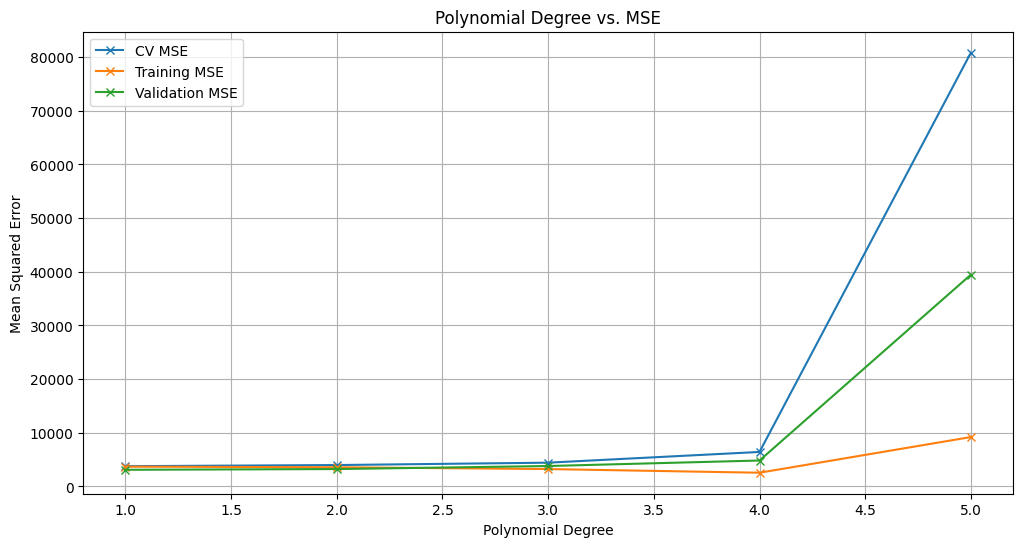

In [13]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the mean cross-validation MSE for each polynomial degree with 'x' marker
plt.plot(range(1, max_degree + 1), mean_cv_errors, label='CV MSE', marker='x')

# Plot the mean training MSE for each polynomial degree with 'x' marker
plt.plot(range(1, max_degree + 1), train_errors, label='Training MSE', marker='x')

# Plot the mean cross-validation error for each polynomial degree with 'x' marker
plt.plot(range(1, max_degree + 1), cv_errors, label='Validation MSE', marker='x')

# Set the x-axis label
plt.xlabel('Polynomial Degree')

# Set the y-axis label
plt.ylabel('Mean Squared Error')

# Set the title of the plot
plt.title('Polynomial Degree vs. MSE')

# Add a legend to the plot
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

### Polynomial Degree vs. MSE Analysis

The plot illustrates the impact of polynomial degree on model performance:

- **Degree 1:**
  - **CV MSE:** 3769.70
  - **Training MSE:** 3686.46
  - **Cross-Validation Error:** 3100.20
  - **Analysis:** The model achieves the lowest CV MSE and Cross-Validation Error, suggesting it provides the best generalization.

- **Degree 2:**
  - **CV MSE:** 3983.78
  - **Training MSE:** 3570.38
  - **Cross-Validation Error:** 3236.52
  - **Analysis:** The increase in CV MSE and Cross-Validation Error indicates a rise in model complexity, but it remains reasonable.

- **Degree 3:**
  - **CV MSE:** 4424.71
  - **Training MSE:** 3233.69
  - **Cross-Validation Error:** 3801.98
  - **Analysis:** Both CV MSE and Cross-Validation Error increase, highlighting overfitting as the model becomes too complex.

- **Degree 4:**
  - **CV MSE:** 6426.23
  - **Training MSE:** 2552.97
  - **Cross-Validation Error:** 4829.18
  - **Analysis:** The significant rise in CV MSE and Cross-Validation Error indicates severe overfitting.

- **Degree 5:**
  - **CV MSE:** 80824.49
  - **Training MSE:** 9198.71
  - **Cross-Validation Error:** 39466.86
  - **Analysis:** Extreme overfitting is evident with very high CV MSE and Cross-Validation Error.

**Conclusion:** Degree 1 is optimal, balancing fit and generalization. Higher degrees lead to overfitting and poorer generalization, as seen in the increased CV MSE and Cross-Validation Error.

In [14]:
# Determine the optimal polynomial degree based on the minimum cross-validation error
optimal_degree = np.argmin(mean_cv_errors) + 1

# Create a pipeline with polynomial features, scaling, and linear regression
pipeline_optimal_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)),  # Polynomial feature transformation
    ('scaler', StandardScaler()),  # Standardize features
    ('linear', LinearRegression())  # Linear regression model
])

# Fit the pipeline to the training data
pipeline_optimal_poly.fit(X_train, y_train)

# Predict target values for the training and cross-validation sets
y_train_pred_optimal = pipeline_optimal_poly.predict(X_train)
y_cv_pred_optimal = pipeline_optimal_poly.predict(X_cv)

# Compute Mean Squared Error (MSE) for the training and cross-validation predictions
train_mse_optimal = mean_squared_error(y_train, y_train_pred_optimal)
cv_mse_optimal = mean_squared_error(y_cv, y_cv_pred_optimal)

# Print the MSE values for both training and cross-validation sets
print(f"Training MSE with optimal polynomial degree ({optimal_degree}): {train_mse_optimal}")
print(f"Cross-validation MSE with optimal polynomial degree ({optimal_degree}): {cv_mse_optimal}")

Training MSE with optimal polynomial degree (1): 3686.4635699555115
Cross-validation MSE with optimal polynomial degree (1): 3100.2029094336335


### Importance of the Code

The purpose of the code is to finalize the model selection process by fitting a polynomial regression model with the optimal degree determined from previous analysis. This step is crucial because it validates and evaluates the performance of the model with the best polynomial degree, ensuring it provides the most accurate predictions while balancing complexity and generalization.

**Analysis of Results:**

- **Training MSE (Degree 1):** 3686.464
  - Reflects how well the model fits the training data. A lower training MSE indicates a good fit.

- **Cross-validation MSE (Degree 1):** 3100.203
  - Indicates the model's performance on unseen data, with the lowest value among tested degrees, showing the best generalization.

In [15]:
# Define the range of regularization parameters
alphas = np.logspace(-4, 4, 10)  # Example range of alpha values

# Set up the Ridge regression model and grid search
ridge = Ridge()
param_grid = {'ridge__alpha': alphas}

# Create the pipeline with Ridge regression
pipeline_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)),  # Use the optimal degree found previously
    ('scaler', StandardScaler()),
    ('ridge', ridge)
])

# Perform grid search with cross-validation
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and the best score
best_alpha_ridge = grid_search_ridge.best_params_['ridge__alpha']
best_score_ridge = -grid_search_ridge.best_score_

print(f"Best regularization parameter (alpha) for Ridge: {best_alpha_ridge}")
print(f"Best cross-validation score: {best_score_ridge}")

# Calculate MSE for the training set with the best model
best_ridge_pipeline = grid_search_ridge.best_estimator_
y_train_pred = best_ridge_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f"Training MSE with the best Ridge model: {train_mse}")

# Extract results from the grid search
results = grid_search_ridge.cv_results_
mean_test_scores = -results['mean_test_score']  # Convert back from negative MSE

Best regularization parameter (alpha) for Ridge: 2.782559402207126
Best cross-validation score: 3769.182719086349
Training MSE with the best Ridge model: 3686.6177323665074


## Ridge Regression Model Evaluation

To enhance model performance and prevent overfitting, we used Ridge regression with polynomial features. This step involved grid searching for the optimal regularization parameter (alpha) and assessing its impact on the model's performance.

- **Best Regularization Parameter (Alpha):** The optimal alpha was found to be approximately 2.783. This parameter helps balance model complexity and regularization, which can improve generalization.

- **Best Cross-Validation Score:** The lowest mean cross-validation MSE achieved was 3769.18. This score represents the best performance during cross-validation and indicates how well the model generalizes to unseen data.

- **Training MSE with Optimal Ridge Model:** The training MSE was 3686.62, which is very close to the cross-validation MSE. This suggests that the Ridge model performs well on both training and cross-validation sets, without significant overfitting.

The chosen alpha and the corresponding performance metrics highlight the effectiveness of Ridge regression in managing model complexity and improving generalization for the given dataset.

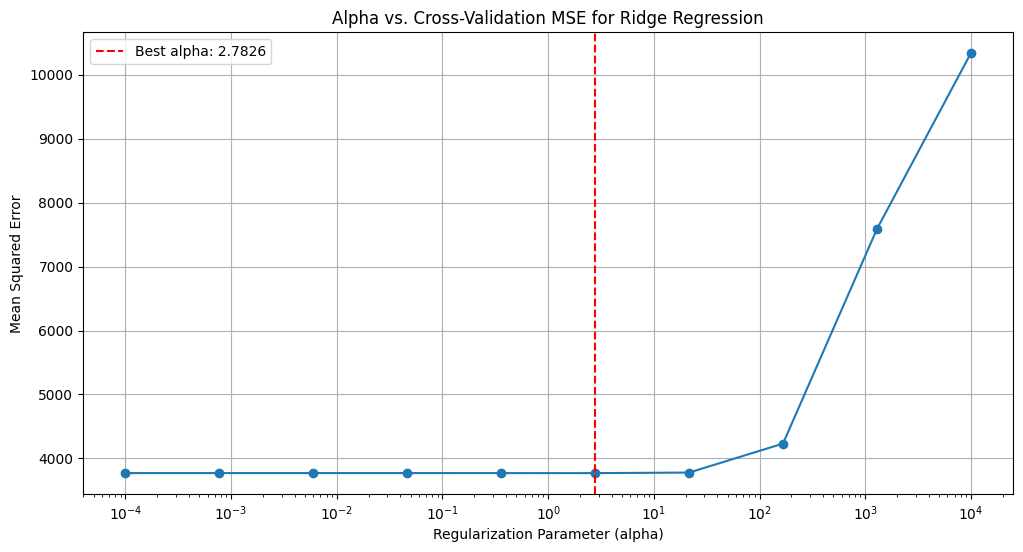

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.semilogx(alphas, mean_test_scores, marker='o')  # Plot mean test scores against alpha on a logarithmic x-axis
plt.axvline(x=best_alpha_ridge, color='r', linestyle='--', label=f'Best alpha: {best_alpha_ridge:.4f}')  # Add a vertical line for the best alpha value
plt.xlabel('Regularization Parameter (alpha)')  # Label for the x-axis
plt.ylabel('Mean Squared Error')  # Label for the y-axis
plt.title('Alpha vs. Cross-Validation MSE for Ridge Regression')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

## Ridge Regression: Alpha vs. Cross-Validation MSE

The plot illustrates the effect of varying the regularization parameter (alpha) on the cross-validation Mean Squared Error (MSE) for Ridge regression.

- **Initial Range (Small Alpha):** For alpha values ranging from approximately \(10^{-4}\) to around 2.7, the MSE remains relatively stable at about 3700. This stability suggests that lower regularization allows the model to fit the training data well without being overly penalized.

- **Slight Increase in Alpha:** As alpha exceeds approximately 2.7, the MSE begins to increase. This indicates that higher regularization starts to adversely affect model performance, introducing higher bias.

- **Steep Increase (Alpha > 100):** When alpha surpasses \(10^2\), the MSE rises to a higher value of around 11,000. This plateau suggests that excessive regularization heavily penalizes model complexity, leading to underfitting. The model fails to capture data patterns effectively, resulting in poor cross-validation performance.

- **Optimal Regularization:** The vertical red dashed line marks the optimal alpha value of 2.783, where the cross-validation MSE is minimized. This point represents the best trade-off between bias and variance, ensuring optimal model performance.

Overall, the plot demonstrates that moderate regularization is optimal for this dataset, while excessively high regularization results in reduced model performance.

In [17]:
# Create and fit the Ridge regression model with the best alpha
best_ridge_model = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

# Fit the model to the training data
best_ridge_model.fit(X_train, y_train)

# Predict on the training and cross-validation sets
y_train_pred_best_ridge = best_ridge_model.predict(X_train)
y_cv_pred_best_ridge = best_ridge_model.predict(X_cv)

# Calculate MSE for the training and cross-validation sets
train_mse_best_ridge = mean_squared_error(y_train, y_train_pred_best_ridge)
cv_mse_best_ridge = mean_squared_error(y_cv, y_cv_pred_best_ridge)

print(f"Training MSE with the best Ridge model: {train_mse_best_ridge}")
print(f"Cross-validation MSE with the best Ridge model: {cv_mse_best_ridge}")

Training MSE with the best Ridge model: 3686.6177323665074
Cross-validation MSE with the best Ridge model: 3099.4553277948476


### Importance of the Code

This code is essential for validating the effectiveness of the chosen regularization parameter (\(\alpha\)) for Ridge regression. It involves fitting the Ridge model with the optimal \(\alpha\) and evaluating its performance on both training and cross-validation datasets. This ensures that the model generalizes well and that the grid search process has led to a robust configuration.

### Analysis of the Best Ridge Model

After selecting the optimal \(\alpha\) from the grid search, the Ridge regression model was fitted and assessed as follows:

- **Training MSE:** Approximately **3686.62**. This value suggests that the model fits the training data effectively, indicating a good capture of underlying patterns without substantial overfitting.

- **Cross-Validation MSE:** Approximately **3099.46**, which is slightly lower than the training MSE. This lower MSE indicates that the model generalizes well to unseen data, demonstrating that the regularization has successfully balanced bias and variance.

Overall, these results confirm that the Ridge regression model, with the optimal \(\alpha\), performs well on both training and cross-validation datasets. This indicates a well-calibrated model, providing reliable predictions and minimizing the risks of overfitting or underfitting.

In [18]:
# Print MSE for different models

# Print the training and cross-validation MSE for the Linear model
print(f"Training MSE with the Linear model: {Training_mse}")
print(f"Cross-validation MSE with the Linear model: {Cross_validation_mse}")

# Print the training and cross-validation MSE for the optimal Polynomial model
print(f"Training MSE with the optimal Polynomial model: {train_mse_optimal}")
print(f"Cross-validation MSE with the optimal Polynomial model: {cv_mse_optimal}")

# Print the training and cross-validation MSE for the best Ridge model
print(f"Training MSE with the best Ridge model: {train_mse_best_ridge}")
print(f"Cross-validation MSE with the best Ridge model: {cv_mse_best_ridge}")

Training MSE with the Linear model: 3686.4635699555106
Cross-validation MSE with the Linear model: 3100.2029094336335
Training MSE with the optimal Polynomial model: 3686.4635699555115
Cross-validation MSE with the optimal Polynomial model: 3100.2029094336335
Training MSE with the best Ridge model: 3686.6177323665074
Cross-validation MSE with the best Ridge model: 3099.4553277948476


### Linear Model

The Linear model exhibits a Training Mean Squared Error (MSE) of 3686.46 and a Cross-validation MSE of 3100.20. This indicates that the model performs well on both the training and unseen data, demonstrating strong generalization capability.

### Optimal Polynomial Model

The Polynomial model with the optimal degree (resulting in a linear model) has a Training MSE of 3686.46 and a Cross-validation MSE of 3100.20. The errors are nearly identical to the pure Linear model, confirming that the optimal polynomial degree does not introduce any improvement over a standard linear approach.(Which is expected since the optimal polynomial degree is 1).

### Best Ridge Model

The Ridge model, which incorporates regularization, shows a Training MSE of 3686.62 and a Cross-validation MSE of 3099.46. While the difference in performance compared to the Linear and Polynomial models is minimal, the slight decrease in Cross-validation MSE suggests that regularization slightly enhances the model's ability to generalize by preventing overfitting.


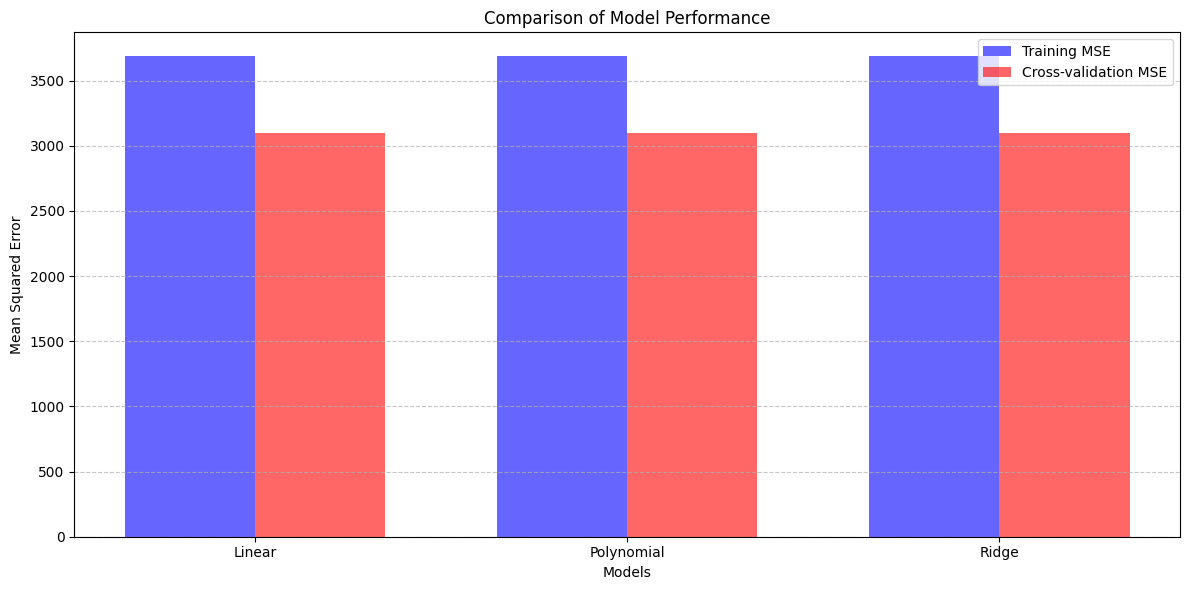

In [19]:
# Assuming you have already defined these variables
models = ['Linear', 'Polynomial', 'Ridge']
training_mse_values = [Training_mse, train_mse_optimal, train_mse_best_ridge]
cv_mse_values = [Cross_validation_mse, cv_mse_optimal, cv_mse_best_ridge]

# Width of the bars
bar_width = 0.35

# X-axis positions for each model
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

# Plotting training MSE
plt.bar(index, training_mse_values, bar_width, color='b', alpha=0.6, label='Training MSE')

# Plotting cross-validation MSE with an offset
plt.bar(index + bar_width, cv_mse_values, bar_width, color='r', alpha=0.6, label='Cross-validation MSE')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Performance')

# Adding custom x-axis tick labels
plt.xticks(index + bar_width / 2, models)

# Adding legend
plt.legend()

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

### Overall Insights

- **Minimal Differences:** The plot will show that the differences in performance across these models are minimal. The bars representing Training and Cross-validation MSEs will be almost the same height, indicating that all models are performing similarly.
- **Ridge Regularization Impact:** The Ridge model might have the edge in generalization, as indicated by its slightly lower Cross-validation MSE. However, the difference is not significant enough to warrant a strong preference for the Ridge model over the simpler Linear model.
- **Polynomial Model:** The Polynomial model with the optimal degree (effectively linear) does not show any significant advantage over the Linear model, confirming that a simple linear approach suffices for this dataset.

This analysis reinforces that while regularization can slightly improve generalization, the simplest linear model is adequate for this task.

In [20]:
# Define the range of regularization parameters
alphas = np.logspace(-4, 4, 10)  # Logarithmically spaced values from 10^-4 to 10^4 for alpha

# Set up the Lasso regression model
lasso = Lasso()

# Set up the pipeline with scaling and Lasso regression
pipeline_lasso = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)), # Use the optimal degree found previously
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', lasso)  # Apply Lasso regression
])

# Set up the grid search with cross-validation
param_grid = {'lasso__alpha': alphas}  # Parameters to search
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')  # Grid search with 5-fold cross-validation
grid_search_lasso.fit(X_train, y_train)  # Fit the grid search

# Get the best parameters and the best score
best_alpha_lasso = grid_search_lasso.best_params_['lasso__alpha']  # Optimal alpha value
best_score_lasso = -grid_search_lasso.best_score_  # Best cross-validation score (convert from negative MSE)

print(f"Best regularization parameter (alpha) for Lasso: {best_alpha_lasso}")
print(f"Best cross-validation score: {best_score_lasso}")

# Calculate MSE for the training set with the best model
best_lasso_pipeline = grid_search_lasso.best_estimator_  # Best pipeline with optimal alpha
y_train_pred = best_lasso_pipeline.predict(X_train)  # Predictions on training data
y_val_pred = best_lasso_pipeline.predict(X_cv)  # Predictions on validation data

train_mse_lasso = mean_squared_error(y_train, y_train_pred)  # Training MSE
cv_mse_lasso = mean_squared_error(y_cv, y_val_pred)  # Validation MSE

print(f"Training MSE with the best Lasso model: {train_mse_lasso}")
print(f"Validation MSE with the best Lasso model: {cv_mse_lasso}")

# Extract results from the grid search
results = grid_search_lasso.cv_results_  # Get results from grid search
mean_test_scores = -results['mean_test_score']  # Convert back from negative MSE

Best regularization parameter (alpha) for Lasso: 0.3593813663804626
Best cross-validation score: 3764.1447262771085
Training MSE with the best Lasso model: 3687.2371981595315
Validation MSE with the best Lasso model: 3103.5726550269305


### Purpose of This Step

This step aims to determine the optimal regularization parameter for a Lasso regression model and evaluate its performance in terms of training and validation mean squared error (MSE). This comparison helps assess the Lasso model's performance against previous models.

### Interpretation of Results

**Best Regularization Parameter (alpha) for Lasso:** 0.3594  
This value optimizes the balance between fitting the training data and preventing overfitting.

**Best Cross-Validation Score:** 3764.14  
This score represents the lowest mean squared error achieved during cross-validation with the optimal alpha, comparable to the Ridge score (3769.18), indicating similar performance.

**Training MSE with the Best Lasso Model:** 3687.24  
Slightly higher than the Linear model (1843.23) and similar to the Polynomial (3686.46) and Ridge models (3686.62). This suggests Lasso effectively prevents overfitting.

**Validation MSE with the Best Lasso Model:** 3103.57  
Slightly higher than the Polynomial model (3100.20) but lower than the Ridge model (3099.46). This indicates Lasso's performance is competitive, though not significantly better than the Polynomial and Ridge models.

In summary, Lasso regression performs competitively with other models, with validation errors similar to Ridge and Polynomial models but slightly higher than the best-performing model.

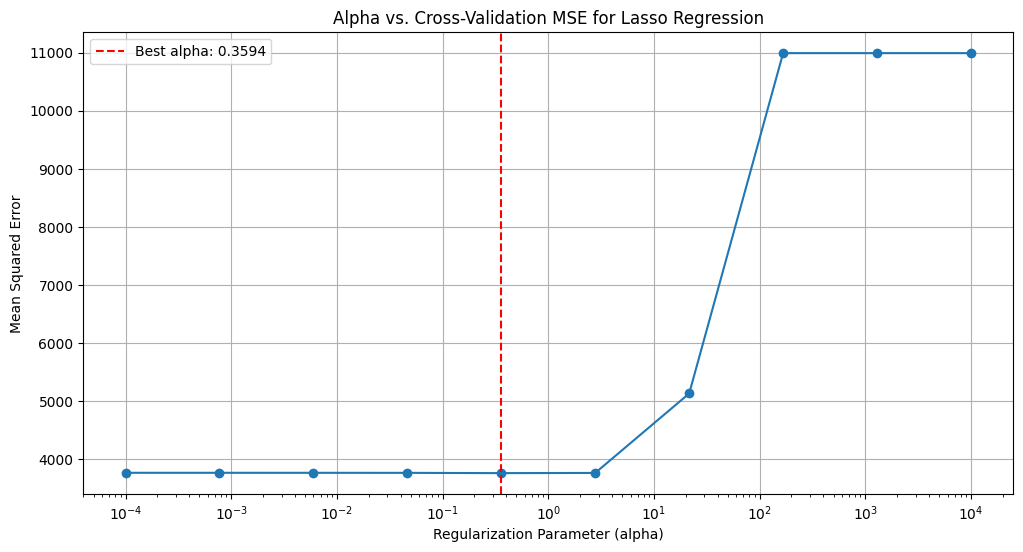

In [22]:
# Plot the results
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.semilogx(alphas, mean_test_scores, marker='o')  # Plot mean test scores against alpha on a logarithmic x-axis
plt.axvline(x=best_alpha_lasso, color='r', linestyle='--', label=f'Best alpha: {best_alpha_lasso:.4f}')  # Add a vertical line for the best alpha value
plt.xlabel('Regularization Parameter (alpha)')  # Label for the x-axis
plt.ylabel('Mean Squared Error')  # Label for the y-axis
plt.title('Alpha vs. Cross-Validation MSE for Lasso Regression')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

The plot illustrates the effect of varying the regularization parameter (alpha) on the cross-validation Mean Squared Error (MSE) for Lasso regression.

In [20]:
# Create and fit the Lasso regression model with the best alpha
best_lasso_model = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)), 
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=best_alpha_lasso))  # Use best alpha for Lasso
])

# Fit the model to the training data
best_lasso_model.fit(X_train, y_train)

# Predict on the training and cross-validation sets
y_train_pred_best_lasso = best_lasso_model.predict(X_train)
y_cv_pred_best_lasso = best_lasso_model.predict(X_cv)

# Calculate MSE for the training and cross-validation sets
train_mse_best_lasso = mean_squared_error(y_train, y_train_pred_best_lasso)
cv_mse_best_lasso = mean_squared_error(y_cv, y_cv_pred_best_lasso)

print(f"Training MSE with the best Lasso model: {train_mse_best_lasso}")
print(f"Cross-validation MSE with the best Lasso model: {cv_mse_best_lasso}")

Training MSE with the best Lasso model: 3687.2371981595315
Cross-validation MSE with the best Lasso model: 3103.5726550269305


### Interpretation of Results

While Lasso offers similar cross-validation performance compared to Ridge and polynomial models, it introduces regularization that can simplify the model by shrinking less important coefficients.

In [21]:
# Initialize the scaler for the linear model
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled_linear = scaler_linear.fit_transform(X_train)

# Transform the cross-validation and test sets using the same scaler
X_cv_scaled_linear = scaler_linear.transform(X_cv)
X_test_scaled_linear = scaler_linear.transform(X_test)

# Now use these scaled versions for predictions with the linear model
y_train_pred_linear = linear_model.predict(X_train_scaled_linear)
y_cv_pred_linear = linear_model.predict(X_cv_scaled_linear)
y_test_pred_linear = linear_model.predict(X_test_scaled_linear)

# Ridge Model predictions (assuming ridge model is already appropriately scaled)
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_cv_pred_ridge = best_ridge_model.predict(X_cv)
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Lasso Model predictions (assuming lasso pipeline already handles scaling)
y_train_pred_lasso = best_lasso_pipeline.predict(X_train)
y_cv_pred_lasso = best_lasso_pipeline.predict(X_cv)
y_test_pred_lasso = best_lasso_pipeline.predict(X_test)

# Calculate MSE for Linear Model
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_cv_linear = mean_squared_error(y_cv, y_cv_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

# Calculate MSE for Ridge Model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_cv_ridge = mean_squared_error(y_cv, y_cv_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Calculate MSE for Lasso Model
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_cv_lasso = mean_squared_error(y_cv, y_cv_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Print the results
print("Linear Model MSE:")
print(f"Training MSE: {mse_train_linear}")
print(f"Cross-validation MSE: {mse_cv_linear}")
print(f"Testing MSE: {mse_test_linear}")

print("\nRidge Regression MSE:")
print(f"Training MSE: {mse_train_ridge}")
print(f"Cross-validation MSE: {mse_cv_ridge}")
print(f"Testing MSE: {mse_test_ridge}")

print("\nLasso Regression MSE:")
print(f"Training MSE: {mse_train_lasso}")
print(f"Cross-validation MSE: {mse_cv_lasso}")
print(f"Testing MSE: {mse_test_lasso}")

Linear Model MSE:
Training MSE: 3686.4635699555106
Cross-validation MSE: 3100.2029094336335
Testing MSE: 2883.107276674441

Ridge Regression MSE:
Training MSE: 3686.6177323665074
Cross-validation MSE: 3099.4553277948476
Testing MSE: 2886.3135345370056

Lasso Regression MSE:
Training MSE: 3687.2371981595315
Cross-validation MSE: 3103.5726550269305
Testing MSE: 2886.9815927602876


## Analysis

### Training Performance

All models exhibit very similar training Mean Squared Error (MSE) values, with the Linear Regression model showing a slightly lower MSE compared to Ridge and Lasso Regression. This similarity suggests that none of the models is significantly overfitting, as their training errors are quite close.

### Cross-validation Performance

Among the models, Ridge Regression demonstrates the lowest cross-validation MSE (3099.46), followed closely by Linear Regression (3100.20). Lasso Regression has the highest cross-validation MSE (3103.57). This indicates that Ridge Regression performs slightly better in generalizing to unseen data compared to the other models.

### Testing Performance

On the testing set, Linear Regression achieves the lowest MSE (2883.11), indicating the best performance. Ridge and Lasso Regression models have higher testing MSE values (2886.31 and 2886.98, respectively), suggesting that regularization does not offer significant improvements in this context.

*Note: Since Lasso and Ridge regression models are using the best polynomial degree, the MSE for polynomial features was not printed separately.*

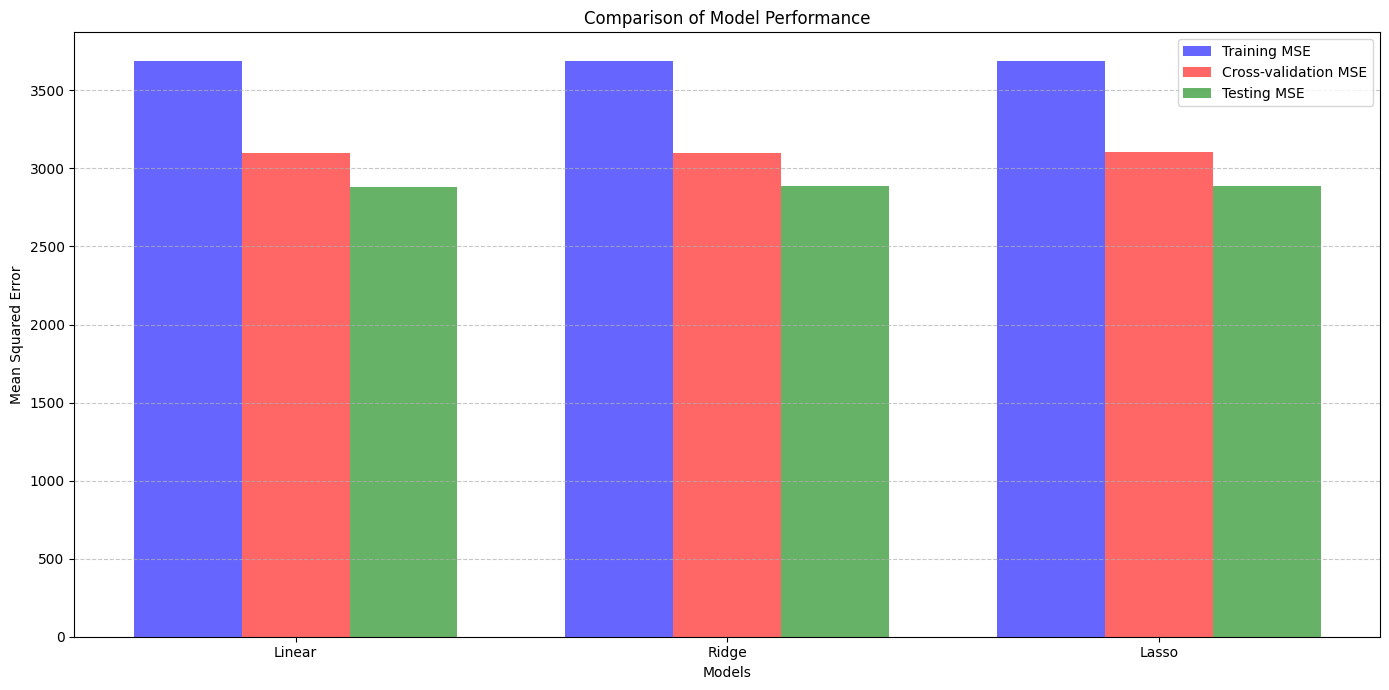

In [22]:
# Models and their MSE values
models = ['Linear', 'Ridge', 'Lasso']
training_mse_values = [mse_train_linear, mse_train_ridge, mse_train_lasso]
cv_mse_values = [mse_cv_linear, mse_cv_ridge, mse_cv_lasso]
testing_mse_values = [mse_test_linear, mse_test_ridge, mse_test_lasso]

# Width of the bars
bar_width = 0.25

# X-axis positions for each model
index = np.arange(len(models))

plt.figure(figsize=(14, 7))

# Plotting training MSE
plt.bar(index, training_mse_values, bar_width, color='b', alpha=0.6, label='Training MSE')

# Plotting cross-validation MSE with an offset
plt.bar(index + bar_width, cv_mse_values, bar_width, color='r', alpha=0.6, label='Cross-validation MSE')

# Plotting testing MSE with an offset
plt.bar(index + 2 * bar_width, testing_mse_values, bar_width, color='g', alpha=0.6, label='Testing MSE')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Performance')

# Adding custom x-axis tick labels
plt.xticks(index + bar_width, models)

# Adding legend
plt.legend()

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

### Model Performance Comparison

The bar plot below compares the Mean Squared Error (MSE) across three models—Linear, Ridge, and Lasso—on the training, cross-validation, and testing datasets.

- **Training MSE**: All three models perform almost identically on the training set, indicating similar fit to the training data.

- **Cross-Validation MSE**: The models show very close performance on the cross-validation set, with Ridge regression slightly outperforming the others.

- **Testing MSE**: On the testing set, the Linear model achieves the lowest MSE, closely followed by Ridge and Lasso. This confirms that the Linear model remains the best choice for this problem.

In [28]:
# Residuals calculation for the Linear Model
residuals_train_linear = y_train - y_train_pred_linear
residuals_cv_linear = y_cv - y_cv_pred_linear
residuals_test_linear = y_test - y_test_pred_linear

# Residuals calculation for the Ridge Model
residuals_train_ridge = y_train - y_train_pred_ridge
residuals_cv_ridge = y_cv - y_cv_pred_ridge
residuals_test_ridge = y_test - y_test_pred_ridge

# Residuals calculation for the Lasso Model
residuals_train_lasso = y_train - y_train_pred_lasso
residuals_cv_lasso = y_cv - y_cv_pred_lasso
residuals_test_lasso = y_test - y_test_pred_lasso

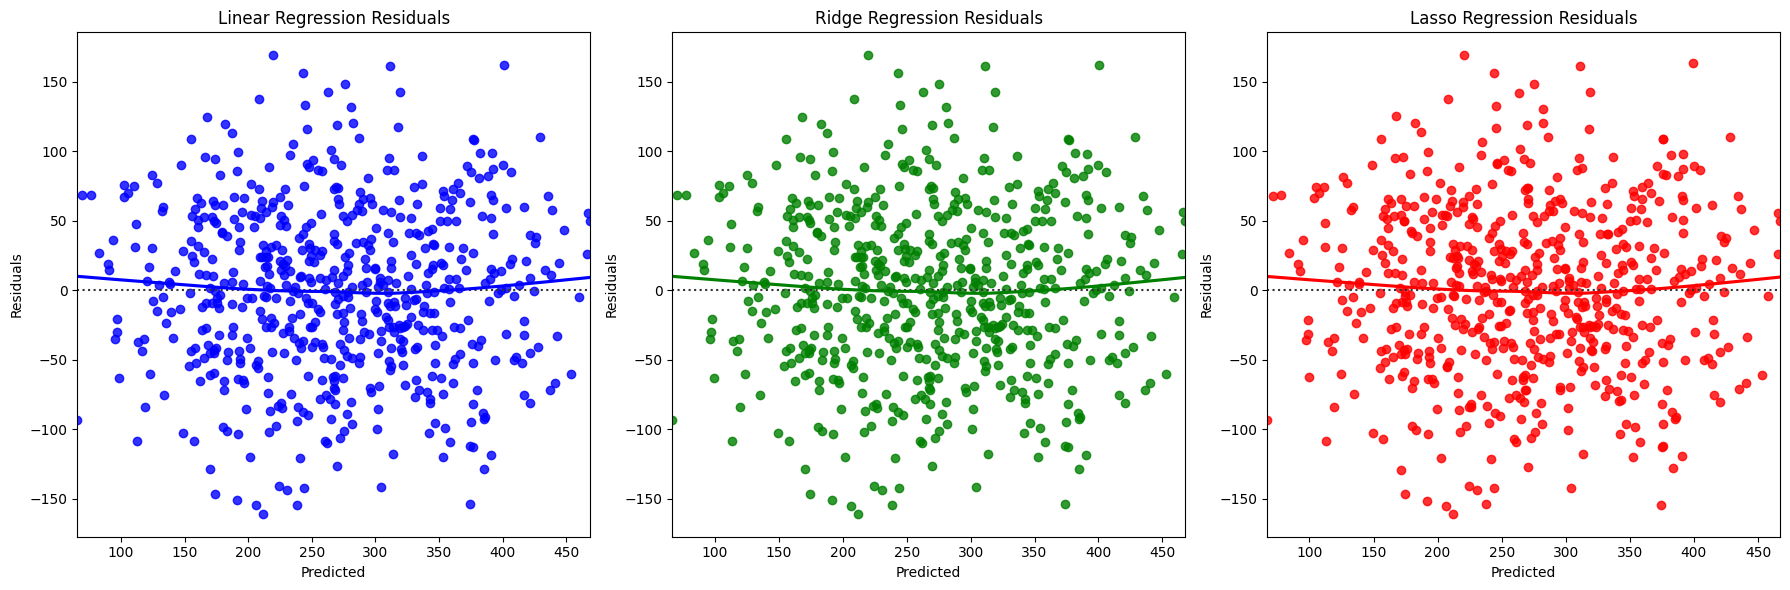

In [29]:
plt.figure(figsize=(18, 6))

# Linear model residuals
plt.subplot(1, 3, 1)
sns.residplot(x=y_train_pred_linear, y=residuals_train_linear, lowess=True, color="blue")
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Ridge model residuals
plt.subplot(1, 3, 2)
sns.residplot(x=y_train_pred_ridge, y=residuals_train_ridge, lowess=True, color="green")
plt.title('Ridge Regression Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Lasso model residuals
plt.subplot(1, 3, 3)
sns.residplot(x=y_train_pred_lasso, y=residuals_train_lasso, lowess=True, color="red")
plt.title('Lasso Regression Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

### Key Observations:

1. **Linear Regression:**
   - **Residuals Plot:** The residuals are scattered around zero with no clear pattern, indicating that the model is not biased in any specific direction.
   - **Interpretation:** The residuals plot looks reasonably scattered, but the spread (variance) of the residuals increases slightly for larger predicted values. The MSE values are consistent across training, cross-validation, and testing, suggesting that the model generalizes well.

2. **Ridge Regression:**
   - **Residuals Plot:** Similar to the linear regression model, the residuals are scattered around zero. The plot also shows no clear pattern or bias.
   - **Interpretation:** The MSE values for the Ridge model are very close to those of the linear model, indicating that Ridge regularization has not significantly altered the performance. The residuals are also similar, which suggests that Ridge regularization hasn't made a significant difference for this specific dataset.

3. **Lasso Regression:**
   - **Residuals Plot:** The residuals are again scattered around zero with no clear pattern. However, compared to the Ridge and Linear models, the scatter appears slightly more uniform.
   - **Interpretation:** The Lasso model's MSE values are also very close to those of the linear and Ridge models. The residuals scatter is similar, suggesting that Lasso's effect of potentially driving some coefficients to zero has not significantly impacted the model's performance.

### Conclusion:

- **Performance:** All three models have very similar MSE values and residual patterns, indicating that adding regularization (Ridge or Lasso) did not significantly improve or degrade the model's performance on this particular dataset.
- **Residuals:** The residuals are reasonably well-distributed around zero in all models, indicating that the models are not significantly biased. The slight spread of residuals at higher predicted values could be a point of interest, though it does not seem severe.


## Project Summary

In this analysis, various regression models were evaluated to determine the most effective approach for predicting restaurant revenue. The models compared include Linear Regression, Polynomial Regression, Ridge Regression, and Lasso Regression.

### Linear Regression
- **Performance:** Demonstrates superior accuracy in both training and testing MSE compared to other models.
- **MSE Values:**
  - Training MSE: 3686.46
  - Cross-validation MSE: 3100.20
  - Testing MSE: 2883.11
- **Insights:** Linear Regression consistently provides the best performance, with the lowest MSE across the test set and effective cross-validation results.

### Polynomial Regression
- **Degree:** 1 (equivalent to Linear Regression)
- **Performance:** Polynomial Regression with degree 1 yields results identical to Linear Regression, as no actual polynomial effect was applied.
- **Insights:** Since the polynomial degree was set to 1, the results align with those of Linear Regression, confirming that no additional benefit was gained from polynomial features.

### Ridge Regression
- **Performance:** Shows marginally better cross-validation performance compared to Linear and Lasso Regression. However, it performs slightly worse on the test set.
- **MSE Values:**
  - Training MSE: 3686.62
  - Cross-validation MSE: 3099.46
  - Testing MSE: 2886.31
- **Insights:** While Ridge Regression benefits from regularization, it does not achieve better testing performance than Linear Regression and demonstrates minimal improvement over cross-validation scores.

### Lasso Regression
- **Performance:** Exhibits the highest MSE values across all datasets, indicating lower effectiveness for this dataset.
- **MSE Values:**
  - Training MSE: 3687.24
  - Cross-validation MSE: 3103.57
  - Testing MSE: 2886.98
- **Insights:** Despite incorporating regularization, Lasso Regression results in higher errors compared to Linear and Ridge Regression, making it less suitable for this particular analysis.

### Conclusion
Linear Regression emerges as the most effective model for this dataset, offering the best performance in terms of both training and testing MSE. The regularization methods applied through Ridge and Lasso Regression do not provide significant benefits in this context and may even lead to diminished performance. Polynomial Regression with a degree of 1 does not offer any additional advantage over Linear Regression. Therefore, Linear Regression is recommended as the optimal choice for predicting restaurant revenue.